In [ ]:
# 문제 제공용 그래프 출력을 위함
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

In [1]:
# 시각화 모듈을 불러오고, 한글 폰트를 설정  
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
# 사용하는 모듈을 불러오고, 버젼 출력
import pandas as pd
import numpy as np
import scipy
import sklearn
import xgboost
import sys

for i in [pd, np, scipy, sklearn, xgboost]:
    print(i.__name__, i.__version__)
print(sys.version)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
sklearn 0.21.3
xgboost 0.80
3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]


In [3]:
!head train_prob.csv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [4]:
df_train = pd.read_csv('train_prob.csv', index_col='id')
df_train.head()

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...    cont5  \
id                                                        ...            
267387    A    B    B    C    B    B    A    E    G    G  ...  0.22443   
410037    A    A    A    A    B    B    A    E    C    F  ...  0.43278   
139373    A    A    B    A    B    B    A    E    C    J  ...  0.36238   
113765    A    A    A    C    B    B    A    E    C    G  ...  0.32670   
179915    A    B    A    C    B    B    A    E    E    L  ...  0.20121   

          cont6    cont7    cont8    cont9   cont10   cont11   cont12  \
id                                                                      
267387  0.69220  0.30912  0.47134  0.53290  0.97139  0.59414  0.36856   
410037  0.97199  0.62596  0.40193  0.49181  0.56479  0.39386  0.36247   
139373  0.41310  0.27010  0.40112  0.53052  0.35635  0.33341  0.33354   
113765  0.42301  0.28331  0.46425  0.38302  0.38054  0.68827  0.34895   
179915  0.37466  0.46316  0.75578  0.55676  0.31308  0.43157  0.32302   

         cont13   target  
id                        
267387  0.42951  8.13741  
410037  0.71541  7.40427  
139373  0.82542  7.98022  
113765  0.73375  7.26085  
179915  0.18028  7.26448  

[5 rows x 25 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 267387 to 415856
Data columns (total 25 columns):
cat0      240000 non-null object
cat1      240000 non-null object
cat2      240000 non-null object
cat3      240000 non-null object
cat4      240000 non-null object
cat5      240000 non-null object
cat6      240000 non-null object
cat7      240000 non-null object
cat8      240000 non-null object
cat9      240000 non-null object
cont0     240000 non-null float64
cont1     240000 non-null float64
cont2     240000 non-null float64
cont3     240000 non-null float64
cont4     240000 non-null float64
cont5     240000 non-null float64
cont6     240000 non-null float64
cont7     240000 non-null float64
cont8     240000 non-null float64
cont9     240000 non-null float64
cont10    240000 non-null float64
cont11    240000 non-null float64
cont12    240000 non-null float64
cont13    240000 non-null float64
target    240000 non-null float64
dtypes: float64(15), object(10)
memory usage

In [6]:
df_train.describe().T

count      mean       std      min       25%       50%       75%  \
cont0   240000.0  0.524941  0.204980 -0.09351  0.370557  0.492330  0.655123   
cont1   240000.0  0.506618  0.235267 -0.04883  0.352300  0.615220  0.687780   
cont2   240000.0  0.443598  0.200168 -0.06027  0.313810  0.456790  0.554300   
cont3   240000.0  0.446806  0.238778  0.13566  0.214838  0.378340  0.720330   
cont4   240000.0  0.455430  0.200648  0.18922  0.279860  0.411310  0.621953   
cont5   240000.0  0.508771  0.231872  0.02789  0.339020  0.441565  0.710500   
cont6   240000.0  0.478530  0.192443  0.04395  0.340030  0.410300  0.604420   
cont7   240000.0  0.456055  0.204553  0.20870  0.278040  0.361060  0.639360   
cont8   240000.0  0.459529  0.220826  0.00404  0.308540  0.425860  0.543070   
cont9   240000.0  0.527177  0.204111  0.07304  0.361970  0.489460  0.753520   
cont10  240000.0  0.505154  0.201410  0.05964  0.339288  0.520620  0.672872   
cont11  240000.0  0.530387  0.230894  0.06416  0.316990  0.559870  0.720550   
cont12  240000.0  0.525060  0.221040 -0.00560  0.332230  0.408835  0.733160   
cont13  240000.0  0.503220  0.225295  0.15812  0.291138  0.433780  0.730690   
target  240000.0  7.456689  0.886714  2.39103  6.798560  7.497645  8.160323   

             max  
cont0    1.05267  
cont1    0.85175  
cont2    1.01769  
cont3    1.00647  
cont4    0.99405  
cont5    1.04110  
cont6    1.09331  
cont7    1.03654  
cont8    1.01416  
cont9    0.96900  
cont10   1.02511  
cont11   1.03647  
cont12   0.96066  
cont13   0.87358  
target  10.29096

In [7]:
df_train.select_dtypes('object').apply(lambda x: list(np.sort(x.unique())), axis=0)

cat0                                           [A, B]
cat1                                           [A, B]
cat2                                           [A, B]
cat3                                     [A, B, C, D]
cat4                                     [A, B, C, D]
cat5                                     [A, B, C, D]
cat6                         [A, B, C, D, E, G, H, I]
cat7                         [A, B, C, D, E, F, G, I]
cat8                            [A, B, C, D, E, F, G]
cat9    [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O]
dtype: object

In [8]:
df_test = pd.read_csv('test_prob.csv', index_col='id')

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 464589 to 199153
Data columns (total 24 columns):
cat0      60000 non-null object
cat1      60000 non-null object
cat2      60000 non-null object
cat3      60000 non-null object
cat4      60000 non-null object
cat5      60000 non-null object
cat6      60000 non-null object
cat7      60000 non-null object
cat8      60000 non-null object
cat9      60000 non-null object
cont0     60000 non-null float64
cont1     60000 non-null float64
cont2     60000 non-null float64
cont3     60000 non-null float64
cont4     60000 non-null float64
cont5     60000 non-null float64
cont6     60000 non-null float64
cont7     60000 non-null float64
cont8     60000 non-null float64
cont9     60000 non-null float64
cont10    60000 non-null float64
cont11    60000 non-null float64
cont12    60000 non-null float64
cont13    60000 non-null float64
dtypes: float64(14), object(10)
memory usage: 11.4+ MB


In [10]:
df_test.select_dtypes('object').apply(lambda x: list(np.sort(x.unique())), axis=0)

cat0                                           [A, B]
cat1                                           [A, B]
cat2                                           [A, B]
cat3                                     [A, B, C, D]
cat4                                     [A, B, C, D]
cat5                                     [A, B, C, D]
cat6                         [A, B, C, D, E, G, H, I]
cat7                            [A, B, C, D, E, F, G]
cat8                            [A, B, C, D, E, F, G]
cat9    [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O]
dtype: object

In [11]:
# 연속형 변수 리스트
cont_cols = ['cont{}'.format(i) for i in range(14)]
# 범주형 변수 리스트 
cat_cols = ['cat{}'.format(i) for i in range(10)]

# 전처리

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

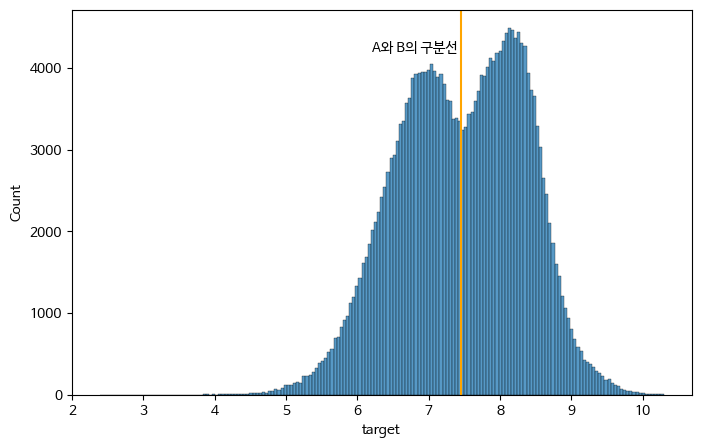

In [13]:
# target의 히스토그램 출력 및 구분선 출력 
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train, x='target')
plt.axvline(7.45, c='orange')
plt.gca().annotate("A와 B의 구분선", (6.2, 4200))
plt.show()

## 단계 1

In [14]:
# 위의 결과에서 먼저 나오는 값의 평균이 높다. 따라서 1 1- predict =  문제에서 제시한 target_A의 요건
# df_train['target_A'] = 1 - gmm.predict(df_train[['target']])
# GMM이 시험 범위에서 빠져서 경계가 되는  값을 제공했습니다.
df_train['target_A'] = df_train['target'] < 7.45

In [15]:
df_train['target_A'].value_counts()

False    123538
True     116462
Name: target_A, dtype: int64

## 단계 2

**출제자 노트**

원래 문제는 치환 대상을 주고 치환할 범주값을 구하는 것까지 문제에 포함했으나, 지나친 반복작업으로 인한 학습효율을 저해할 수 있어 치환조건들은 제공해주는 형태로 변경했습니다. 아래 솔루션에서는 치환하는 규칙을 만든 로직이 있으니, 참조하시면 됩니다.

In [16]:
df_train['cat3'].value_counts(normalize=True) * 100

C    61.191667
A    34.847500
D     3.752083
B     0.208750
Name: cat3, dtype: float64

In [17]:
df_conti = pd.crosstab(index=df_train['target_A'], columns=df_train['cat3'], normalize='columns')
#df_conti = df_conti / df_conti.sum(axis=0)
df_conti

cat3            A         B         C         D
target_A                                       
False     0.49945  0.516966  0.524152  0.503165
True      0.50055  0.483034  0.475848  0.496835

In [18]:
# cat3에서 target_A에 대한 비율을 구하고 범주 'B'와 비율이 가장 유사한 범주를 찾는다
for i in ['A', 'C', 'D']:
    print(i, abs(df_conti[i][1] -  df_conti['B'][1]))

A 0.017516083408188998
C 0.007186185982929971
D 0.013801159480040459


cat3: B→C

In [19]:
# B와 비율이 가장 유사한 것은 C이다, 따라서 B를 C로 치환한다.
df_train['cat3'] = df_train['cat3'].replace({'B': 'C'})
df_test['cat3'] = df_test['cat3'].replace({'B': 'C'})

In [20]:
df_train['cat3'].value_counts()

C    147361
A     83634
D      9005
Name: cat3, dtype: int64

In [21]:
# cat4의 치환규칙 도출 과정
import itertools
from scipy.stats import chi2_contingency

df_conti = pd.crosstab(index=df_train['target_A'], columns=df_train['cat4'])
df_conti

cat4        A       B    C    D
target_A                       
False     546  122375  371  246
True      484  115508  232  238

In [22]:
for i in itertools.combinations(df_conti.columns, 3):
    print(i, chi2_contingency(df_conti[list(i)])[1])

('A', 'B', 'C') 2.9712778605760328e-06
('A', 'B', 'D') 0.5820127654749061
('A', 'C', 'D') 0.00044773831915567724
('B', 'C', 'D') 4.648857943504313e-06


**cat4: A→B, D→B**

In [23]:
df_train['cat4'] = df_train['cat4'].replace({'A': 'B', 'D': 'B'})
df_test['cat4'] = df_test['cat4'].replace({'A': 'B', 'D': 'B'})
df_train['cat4'].value_counts()

B    239397
C       603
Name: cat4, dtype: int64

In [24]:
# cat6의 치환규칙 도출 과정
df_conti = pd.crosstab(index=df_train['target_A'], columns=df_train['cat6']).fillna(0)
df_conti

cat6           A     B    C   D  E  G  H   I
target_A                                    
False     119630  3359  454  67  9  2  5  12
True      114433  1764  196  51  5  0  3  10

In [25]:
# cat6
df_conti = pd.crosstab(index=df_train['target_A'], columns=df_train['cat6'], normalize='columns').fillna(0)
df_conti

cat6             A         B         C         D         E    G      H  \
target_A                                                                 
False     0.511102  0.655671  0.698462  0.567797  0.642857  1.0  0.625   
True      0.488898  0.344329  0.301538  0.432203  0.357143  0.0  0.375   

cat6             I  
target_A            
False     0.545455  
True      0.454545

In [26]:
dic = {}

l = ['A', 'B', 'C']
for i in ['D', 'E', 'G', 'H', 'I']:
    dist = [abs(df_conti[i][1] -  df_conti[j][1]) for j in l]
    dic[i] = l[np.argmin(dist)]
dic

{'D': 'A', 'E': 'B', 'G': 'C', 'H': 'B', 'I': 'A'}

**cat6: D→A, E→B, G→C, H→B, I→A**

In [27]:
df_train['cat6'] = df_train['cat6'].replace(dic)
df_test['cat6'] = df_test['cat6'].replace(dic)

In [28]:
df_train['cat6'].value_counts()

A    234203
B      5145
C       652
Name: cat6, dtype: int64

In [29]:
# mapping 값을 구하는 함수를 이용
# 치환하려는 범주값과 비율이 가장 가까운 범주값을 구하여, dictionary 형태로 반환
def get_replace_dic(df, cat_col, a, b):
    df_conti = pd.crosstab(index=df_train['target_A'], columns=df_train[cat_col], normalize='columns').fillna(0)
    dic = {}
    for i in a:
        dist = [abs(df_conti[i][1] - df_conti[j][1]) for j in b]
        dic[i] = b[np.argmin(dist)]
    return dic, df_conti

In [30]:
df_conti = pd.crosstab(index=df_train['target_A'], columns=df_train['cat7'], normalize='columns').fillna(0)
df_conti

cat7        A         B    C         D         E         F         G    I
target_A                                                                 
False     0.6  0.556016  0.6  0.547858  0.510903  0.548673  0.498421  1.0
True      0.4  0.443984  0.4  0.452142  0.489097  0.451327  0.501579  0.0

In [31]:
dic, _ = get_replace_dic(df_train, 'cat7', ['A', 'C', 'F', 'I'], ['B', 'D', 'E', 'G'])
dic

{'A': 'B', 'C': 'B', 'F': 'D', 'I': 'B'}

**cat7: A→B, C→B, F→D, I→B**

In [32]:
df_train['cat7'] = df_train['cat7'].replace(dic)
df_test['cat7'] = df_test['cat7'].replace(dic)
df_train['cat7'].value_counts().sort_index()

B      4606
D     19784
E    214027
G      1583
Name: cat7, dtype: int64

**cat8: B→G, F→E**

In [33]:
# cat8은 B를 G로 치환하라, F는 E.
df_train['cat8'] = df_train['cat8'].replace({'B': 'G', 'F': 'E'})
df_test['cat8'] = df_test['cat8'].replace({'B': 'G', 'F': 'E'})

In [34]:
df_train['cat8'].value_counts()

C    96743
E    76085
G    33881
A    30338
D     2953
Name: cat8, dtype: int64

In [35]:
dic, _ = get_replace_dic(df_train, 'cat9', ['C', 'D', 'E'], ['A', 'B', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'])
dic

{'C': 'H', 'D': 'B', 'E': 'L'}

**cat9: B→G, F→E**

In [36]:
df_train['cat9'] = df_train['cat9'].replace(dic)
df_test['cat9'] = df_test['cat9'].replace(dic)
df_train['cat9'].value_counts().sort_index().to_frame().T

A     B      F     G      H      I     J      K      L     M     N  \
cat9  10678  2846  85944  8320  19987  40070  5501  16743  33793  7819  3331   

         O  
cat9  4968

반복적인 처리는 반복문을 설계하여 처리해보자.

In [37]:
repl_list = [
    ('cat3', {'B': 'C'}),
    ('cat4', {'A': 'B', 'D': 'B'}),
    ('cat6', {'D': 'A', 'E': 'B', 'G': 'C', 'H': 'B', 'I': 'A'}),
    ('cat7', {'A': 'B', 'C': 'B', 'F': 'D', 'I': 'B'}),
    ('cat8', {'B': 'G', 'F': 'E'}),
    ('cat9', {'C': 'H', 'D': 'B', 'E': 'L'})
]

In [38]:
for col, dic in repl_list:
    df_train[col] = df_train[col].replace(dic)
    df_test[col] = df_test[col].replace(dic)

In [39]:
df_train[cat_cols].apply(lambda x: x.value_counts()).unstack().to_frame().dropna().astype(int).sort_index(level=(0, 1))

0
cat0 A  225233
     B   14767
cat1 A  130134
     B  109866
cat2 A  221164
     B   18836
cat3 A   83634
     C  147361
     D    9005
cat4 B  239397
     C     603
cat5 A    3101
     B  119251
     C    9403
     D  108245
cat6 A  234203
     B    5145
     C     652
cat7 B    4606
     D   19784
     E  214027
     G    1583
cat8 A   30338
     C   96743
     D    2953
     E   76085
     G   33881
cat9 A   10678
     B    2846
     F   85944
     G    8320
     H   19987
     I   40070
     J    5501
     K   16743
     L   33793
     M    7819
     N    3331
     O    4968

In [40]:
df_base = df_train.copy()

# 문제 1

**출제자 노트**

Pandas의 Group-BY를 능숙히 다룰 수 이를 이용하여 풀 수도 있지만, Loop를 이용해서도 풀 수 있다. 

풀이를 접근 할 때, 자신이 맞는 방법을 연습하여 대응하도록 한다.

또한 Kolmogorov-Smironov 검정은 누적확률함수를 매개변수를 받는 다소 생소한 호출 요건을 가지고 있다. 함수를 입력으로 받는 함수에 대한 대응 능력을 키운다.

## 단계 1-1

In [41]:
df_prob1 = df_base.copy()

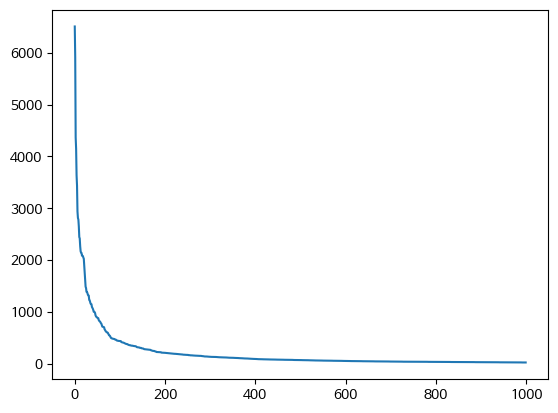

In [42]:
plt.plot(df_train[cat_cols].apply(lambda x: "".join(list(x)), axis=1).value_counts().iloc[:1000].values)

In [43]:
df_prob1['cat_c'] = df_prob1[cat_cols].apply(lambda x: ''.join(list(x)), axis=1)
# 요런 방법도 가능
#df_prob1['cat_c'] = df_prob1[cat_cols].apply(lambda x: x.str.cat(), axis=1)
df_prob1.head(5)

cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...    cont7  \
id                                                        ...            
267387    A    B    B    C    B    B    A    E    G    G  ...  0.30912   
410037    A    A    A    A    B    B    A    E    C    F  ...  0.62596   
139373    A    A    B    A    B    B    A    E    C    J  ...  0.27010   
113765    A    A    A    C    B    B    A    E    C    G  ...  0.28331   
179915    A    B    A    C    B    B    A    E    E    L  ...  0.46316   

          cont8    cont9   cont10   cont11   cont12   cont13   target  \
id                                                                      
267387  0.47134  0.53290  0.97139  0.59414  0.36856  0.42951  8.13741   
410037  0.40193  0.49181  0.56479  0.39386  0.36247  0.71541  7.40427   
139373  0.40112  0.53052  0.35635  0.33341  0.33354  0.82542  7.98022   
113765  0.46425  0.38302  0.38054  0.68827  0.34895  0.73375  7.26085   
179915  0.75578  0.55676  0.31308  0.43157  0.32302  0.18028  7.26448   

        target_A       cat_c  
id                            
267387     False  ABBCBBAEGG  
410037      True  AAAABBAECF  
139373     False  AABABBAECJ  
113765      True  AAACBBAECG  
179915      True  ABACBBAEEL  

[5 rows x 27 columns]

In [44]:
v_cnt = df_prob1['cat_c'].value_counts()

## 단계 1-2

In [45]:
from scipy.stats import kstest
from scipy.stats import norm

## 방법 1

Group-By를 이용한 버젼

In [46]:
# Group-By를 이용한 Version I
# (1) GroupBy filter 기능을 이용하여, groupby 연산 후의 값으로 row를 필터링
# (2) kstest에는 누적확률함수를 넘겨야한다. norm.cdf의 기본값은 평균이 0, 표준편차는 0이다 따라서, kstest에 넘길 때 값을 표준화해야한다.
# 이론 교재 60 Page 참조
# (3) cat_c의 빈도수를 결함
df_ks_result = df_prob1.groupby('cat_c').filter(lambda x: len(x) >= 50)\
        .groupby('cat_c')\
        .apply(lambda x: 
               pd.Series(kstest((x['target'] - x['target'].mean()) / x['target'].std(), norm.cdf), 
                         index=['statistics', 'pvalue']))\
        .join(df_prob1['cat_c'].value_counts().rename('cnt')) \
        .sort_values(['cnt', 'pvalue'], ascending=[False, True])
df_ks_result

statistics        pvalue   cnt
cat_c                                     
AAAABBAECF    0.060856  2.165306e-21  6507
AAAABDAECF    0.089300  1.709063e-41  5915
ABACBBAEEL    0.051439  1.763877e-10  4366
AAACBBAECF    0.053636  8.357369e-11  4145
AAACBDAECF    0.077939  1.172657e-19  3636
...                ...           ...   ...
ABBCBDAEEM    0.077785  8.997335e-01    50
AAACBCAEEI    0.071563  9.438446e-01    50
ABADBDAEAL    0.067553  9.647810e-01    50
BBAABDAEEF    0.060599  9.876562e-01    50
ABBABBAECI    0.048159  9.994752e-01    50

[626 rows x 3 columns]

In [47]:
from scipy.stats import zscore

df_ks_result = df_prob1.groupby('cat_c').filter(lambda x: len(x) >= 50)\
        .groupby('cat_c')\
        .apply(lambda x: pd.Series(kstest(zscore(x['target'], ddof=1), norm.cdf), index=['statistics', 'pvalue']))\
        .join(df_prob1['cat_c'].value_counts().rename('cnt')) \
        .sort_values(['cnt', 'pvalue'], ascending=[False, True])
df_ks_result

statistics        pvalue   cnt
cat_c                                     
AAAABBAECF    0.060856  2.165306e-21  6507
AAAABDAECF    0.089300  1.709063e-41  5915
ABACBBAEEL    0.051439  1.763877e-10  4366
AAACBBAECF    0.053636  8.357369e-11  4145
AAACBDAECF    0.077939  1.172657e-19  3636
...                ...           ...   ...
ABBCBDAEEM    0.077785  8.997335e-01    50
AAACBCAEEI    0.071563  9.438446e-01    50
ABADBDAEAL    0.067553  9.647810e-01    50
BBAABDAEEF    0.060599  9.876562e-01    50
ABBABBAECI    0.048159  9.994752e-01    50

[626 rows x 3 columns]

In [48]:
# Group-By를 이용한 Version II
# Partial을 이용하여 kstest에 넘기는 누적확률함수의 디폴트(default) 매개변수를 변경
from functools import partial

df_ks_result = df_prob1.groupby('cat_c').filter(lambda x: len(x) >= 50)\
        .groupby('cat_c')\
        .apply(lambda x: 
               pd.Series(kstest(x['target'], partial(norm.cdf, loc=x['target'].mean(), scale=x['target'].std())), 
                         index=['statistics', 'pvalue']))\
        .join(df_prob1['cat_c'].value_counts().rename('cnt')) \
        .sort_values(['cnt', 'pvalue'], ascending=[False, True])
df_ks_result

statistics        pvalue   cnt
cat_c                                     
AAAABBAECF    0.060856  2.165306e-21  6507
AAAABDAECF    0.089300  1.709063e-41  5915
ABACBBAEEL    0.051439  1.763877e-10  4366
AAACBBAECF    0.053636  8.357369e-11  4145
AAACBDAECF    0.077939  1.172657e-19  3636
...                ...           ...   ...
ABBCBDAEEM    0.077785  8.997335e-01    50
AAACBCAEEI    0.071563  9.438446e-01    50
ABADBDAEAL    0.067553  9.647810e-01    50
BBAABDAEEF    0.060599  9.876562e-01    50
ABBABBAECI    0.048159  9.994752e-01    50

[626 rows x 3 columns]

In [49]:
# 반복문을 이용한 Version
cat_c_ = []
for k, v in v_cnt.items():
    if v < 50:
        break
    # Series의 Transform도 써볼 수 있다.
    result = kstest(zscore(df_prob1.loc[df_prob1["cat_c"] == k,'target']), norm.cdf)
    """
    if result.pvalue > 0.05:
        #print(k, v, result)
        cat_c_.append((k, result, v))
    """
    cat_c_.append((k, result, v))

In [50]:
df_ks_result = pd.DataFrame({'cat_c': [i[0] for i in cat_c_],
                             'statistic': [i[1].statistic for i in cat_c_],
                             'pvalue': [i[1].pvalue for i in cat_c_],
                             'cnt': [i[2] for i in cat_c_]}).set_index('cat_c')
df_ks_result.sort_values(['cnt', 'pvalue'], ascending=[False, True], inplace=True)

In [51]:
df_ks_result

statistic        pvalue   cnt
cat_c                                    
AAAABBAECF   0.060870  2.115109e-21  6507
AAAABDAECF   0.089311  1.671599e-41  5915
ABACBBAEEL   0.051456  1.736877e-10  4366
AAACBBAECF   0.053657  8.203372e-11  4145
AAACBDAECF   0.077964  1.140213e-19  3636
...               ...           ...   ...
ABBCBDAEEM   0.079997  8.808641e-01    50
AAACBCAEEI   0.074002  9.282049e-01    50
ABADBDAEAL   0.069456  9.555887e-01    50
BBAABDAEEF   0.062592  9.827046e-01    50
ABBABBAECI   0.049759  9.990963e-01    50

[626 rows x 3 columns]

In [52]:
df_ks_result.query('pvalue > 0.05').iloc[:3]

statistic    pvalue   cnt
cat_c                                
ABACBBAEEI   0.030857  0.053763  1888
AAAABBAEEI   0.040329  0.099523   914
AAACBDAEGI   0.044795  0.056755   880

In [53]:
df_ks_result.query('pvalue > 0.05').iloc[-3:]

statistic    pvalue  cnt
cat_c                               
ABADBDAEAL   0.069456  0.955589   50
BBAABDAEEF   0.062592  0.982705   50
ABBABBAECI   0.049759  0.999096   50

## 단계 1-3

In [54]:
from scipy.stats import bartlett

## 방법 1

In [55]:
result = bartlett(*df_prob1.loc[df_prob1['cat_c'].isin(df_ks_result.query('pvalue >= 0.05').index[:3])].groupby('cat_c')\
        .apply(lambda x: list(x['target'])))

A = result.statistic
A, result.pvalue

(9.478560380242815, 0.00874493861372744)

In [56]:
result = bartlett(*df_prob1.loc[df_prob1['cat_c'].isin(df_ks_result.query('pvalue >= 0.05').index[-3:])].groupby('cat_c')\
        .apply(lambda x: list(x['target'])))
B = result.statistic
B, result.pvalue

(0.4140582984181041, 0.8129959514532286)

## 방법 2

In [57]:
result = bartlett(
    df_prob1.loc[df_prob1['cat_c'] == 'ABACBBAEEI', 'target'],
    df_prob1.loc[df_prob1['cat_c'] == 'AAAABBAEEI', 'target'],
    df_prob1.loc[df_prob1['cat_c'] == 'AAACBDAEGI', 'target']
)

A = result.statistic
A, result.pvalue

(9.478560380242815, 0.00874493861372744)

In [58]:
result = bartlett(
    df_prob1.loc[df_prob1['cat_c'] == 'ABADBDAEAL', 'target'],
    df_prob1.loc[df_prob1['cat_c'] == 'BBAABDAEEF', 'target'],
    df_prob1.loc[df_prob1['cat_c'] == 'ABBABBAECI', 'target']
)

B = result.statistic
B, result.pvalue

(0.4140582984181428, 0.8129959514532129)

## 단계 4

In [59]:
from scipy.stats import f_oneway

In [60]:
anova_cat = df_ks_result.query('pvalue >= 0.05').index[-3:]
anova_cat

Index(['ABADBDAEAL', 'BBAABDAEEF', 'ABBABBAECI'], dtype='object', name='cat_c')

In [61]:
# 방법 1
result = f_oneway(*df_prob1.loc[df_prob1['cat_c'].isin(anova_cat)].groupby('cat_c')\
        .apply(lambda x: list(x['target'])))

C = result.pvalue
C, result

(0.8471654486810101,
 F_onewayResult(statistic=0.1660465473994472, pvalue=0.8471654486810101))

In [62]:
# 방법 2
result = f_oneway(
    df_prob1.loc[df_prob1['cat_c'] == 'ABADBDAEAL', 'target'],
    df_prob1.loc[df_prob1['cat_c'] == 'BBAABDAEEF', 'target'],
    df_prob1.loc[df_prob1['cat_c'] == 'ABBABBAECI', 'target']
)

C = result.pvalue
C, result

(0.8471654486810101,
 F_onewayResult(statistic=0.16604654739944721, pvalue=0.8471654486810101))

In [63]:
A + B + C

10.739784127341967

**시험장: 10.740, BDC: 10.740**

# 문제 2

**출제자 노트**

자주 사용된 모델이나  함수가 아니거나, 생소한 패턴에 대한 해법이 필요할 때를 연습하기 위한 문제입니다.

 클러스터링할 때 입력데이터를 넘겨주어 클러스터링 단계에서 각 샘플간의 거리를 구하도록하는 방법과 입력데이터로 거리를 구하기 어려울 경우에는 샘플간의 거리를 Matrix 형태로 만들어 Clustering 입력으로 하도록하는 방법도 있습니다. 아래 나오는 경우는 후자의 경우에 해당합니다. 두 가지 방법을 습득하여 상황에 맞게 활용하도록 합니다.


<Figure size 1200x700 with 0 Axes>

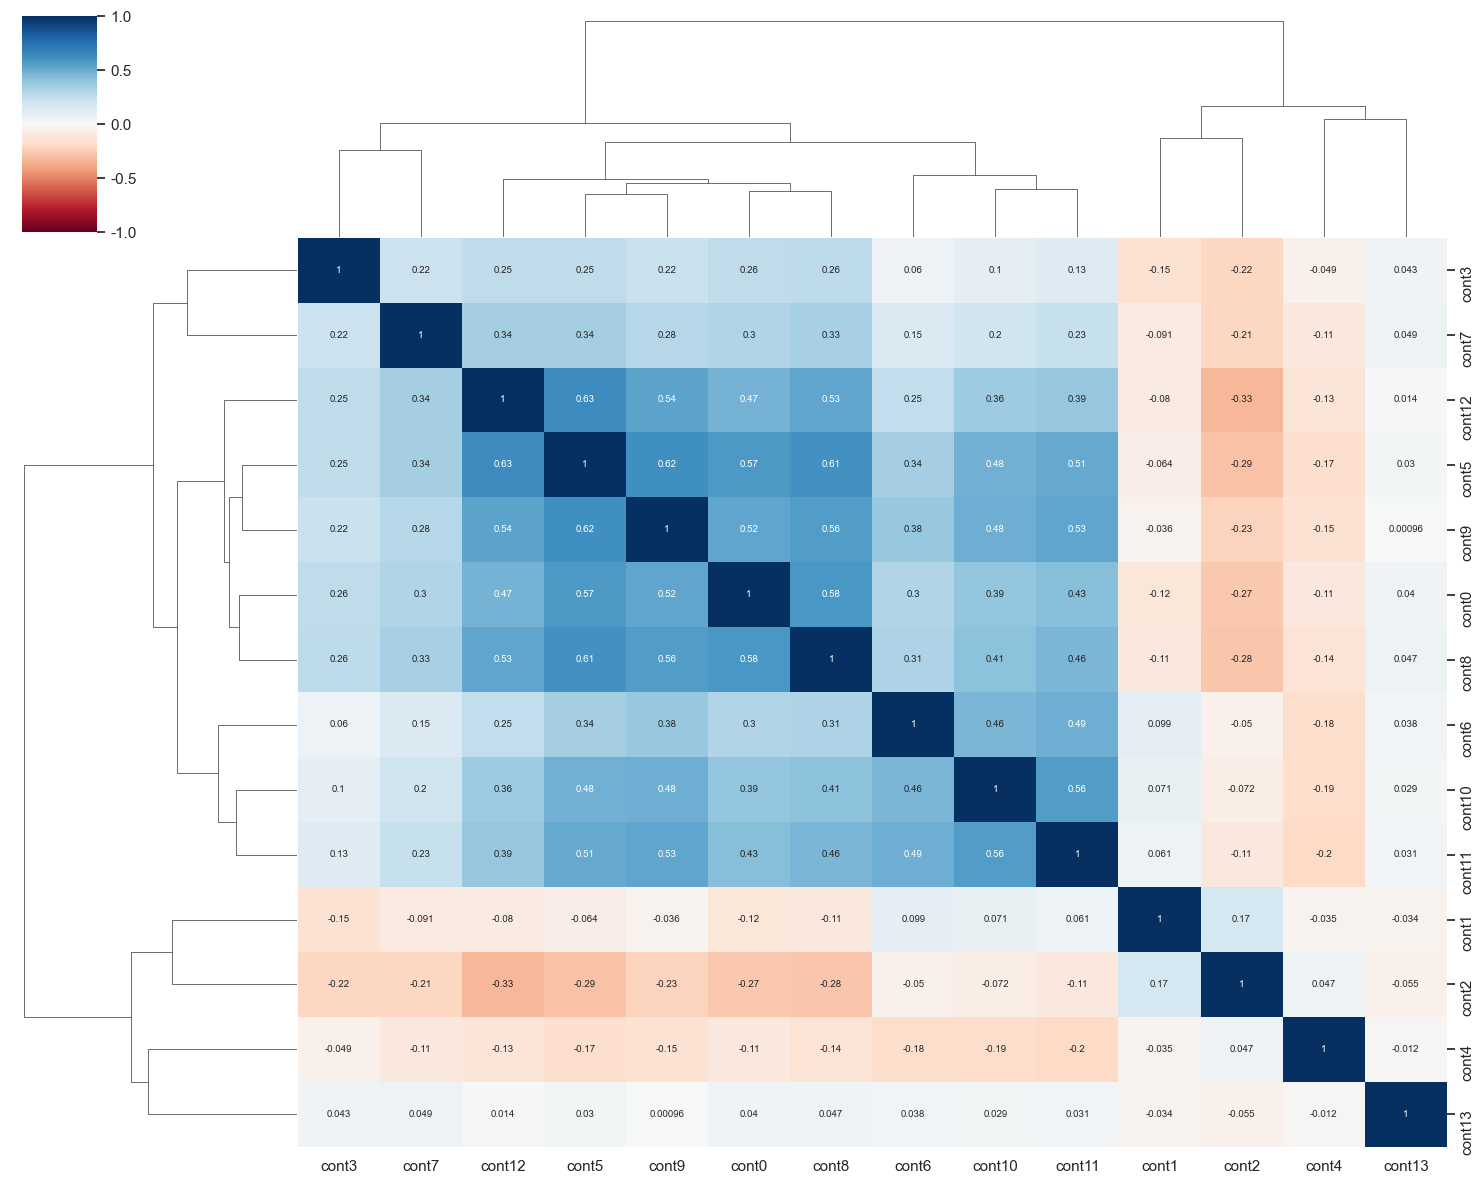

In [64]:
# 문제에 사용한 차트
plt.figure(figsize=(12, 7))
sns.set(font_scale=1)
sns.clustermap(df_train[cont_cols].corr(), method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));
plt.show()

## 단계 2-1

In [65]:
df_corr = df_base[cont_cols].corr()
df_corr.index.name = 'feat_1'

## 단계 2-2

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
# 메뉴얼을 보고 어떤 값을 넘길지 확인해 봅시다.
# AgglomerativeClustering?에 대한 내용 발췌

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    pooling_func='deprecated',
    distance_threshold=None,
)
Docstring:     
Agglomerative Clustering

Recursively merges the pair of clusters that minimally increases
a given linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, optional (default=2)
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : string or callable, default: "euclidean"
    Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
    "manhattan", "cosine", or "precomputed".
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead of a similarity matrix)
    is needed as input for the fit method.

memory : None, str or object with the joblib.Memory interface, optional
    Used to cache the output of the computation of the tree.
    By default, no caching is done. If a string is given, it is the
    path to the caching directory.

connectivity : array-like or callable, optional
    Connectivity matrix. Defines for each sample the neighboring
    samples following a given structure of the data.
    This can be a connectivity matrix itself or a callable that transforms
    the data into a connectivity matrix, such as derived from
    kneighbors_graph. Default is None, i.e, the
    hierarchical clustering algorithm is unstructured.

compute_full_tree : bool or 'auto' (optional)
    Stop early the construction of the tree at n_clusters. This is
    useful to decrease computation time if the number of clusters is
    not small compared to the number of samples. This option is
    useful only when specifying a connectivity matrix. Note also that
    when varying the number of clusters and using caching, it may
    be advantageous to compute the full tree. It must be ``True`` if
    ``distance_threshold`` is not ``None``.

linkage : {"ward", "complete", "average", "single"}, optional             (default="ward")
    Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion.

    - ward minimizes the variance of the clusters being merged.
    - average uses the average of the distances of each observation of
      the two sets.
    - complete or maximum linkage uses the maximum distances between
      all observations of the two sets.
    - single uses the minimum of the distances between all observations
      of the two sets.

pooling_func : callable, default='deprecated'
    Ignored.

    .. deprecated:: 0.20
        ``pooling_func`` has been deprecated in 0.20 and will be removed
        in 0.22.

distance_threshold : float, optional (default=None)
    The linkage distance threshold above which, clusters will not be
    merged. If not ``None``, ``n_clusters`` must be ``None`` and
    ``compute_full_tree`` must be ``True``.

    .. versionadded:: 0.21

In [68]:
# 절대값이 1에 가까울 수록 두 변수간의 연관성은 큽니다.
# 이는  곧 절대값이 1에 가까울수록 
df_dist = df_corr.applymap(lambda x: 1 - abs(x))

In [69]:
# sklearn의 버젼에 따라 방법이 다릅니다.
# 시험장 버젼은 1.2이하여서 아래 코드를 사용하면 됩니다.
# 시험 볼 때는 버젼을 고려한 코딩 필요없고, 시험장 환경에서만 정상작동하면 됩니다.
# sklearn 1.2 이상
if sklearn.__version__ >= '1.2':
    clu = AgglomerativeClustering(n_clusters=None,
                                  distance_threshold = 0.5,
                                  metric='precomputed',
                                  linkage='average')
    clu.fit(df_dist.values)
else:
    # n_clusters는 None으로하여 distance_threshold로 군집의 수가 정해지도록
    # affinity를 precomuted로 하여 거리 행렬을 사용한다
    # 결합 기준 1 - abs(상관도)로 정했다. 문제 조건에서 군집간에 상관도의 평균이 0.5 이상에서 
    # distance_threshold  0.5 
    # linkage를 average로하여 두 군집간의 평균 거리를 결합 기준으로 하도록한다.
    clu = AgglomerativeClustering(n_clusters=None,
                              affinity='precomputed',
                              distance_threshold = 0.5,
                              linkage='average')
    clu.fit(df_dist.values)
clu

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0.5,
                        linkage='average', memory=None, n_clusters=None,
                        pooling_func='deprecated')

In [70]:
# Label 확인
clu.labels_

array([0, 5, 6, 4, 7, 0, 8, 2, 0, 0, 1, 1, 0, 3], dtype=int64)

In [71]:
# 0이 가장 많다.
# 이후 PCA 입력 변수로 지정한다.
pca_cols = df_corr.loc[clu.labels_ == 0].index.values
pca_cols

array(['cont0', 'cont5', 'cont8', 'cont9', 'cont12'], dtype=object)

## 단계 2-3

In [72]:
# One-Hot Encoding을 Pandas로 해도 되지만,
# Train에 나오는 범주값들과 Test에 나오는 범주값들이 동일해야 한다.
# Kaggle 형을 풀 때 pd.get_dummies를 사용할 경우가 생긴다면, 이를 확인해야 한다.
# 이 경우는 train과 test 분리전에 사용해서 고려하지 않아도 된다. get_dummies를 써도 지장은 없다.

df_prob2 = pd.get_dummies(df_base, drop_first=True)

# OHE 인코딩으로 나온 파생 변수 명을 확인
ohe_cols =[i for i in df_prob2.columns if i.startswith('cat')]
ohe_cols # 시험장 환경에서는 알파벳 순으로 정렬되서 나온다.

['cat0_B',
 'cat1_B',
 'cat2_B',
 'cat3_C',
 'cat3_D',
 'cat4_C',
 'cat5_B',
 'cat5_C',
 'cat5_D',
 'cat6_B',
 'cat6_C',
 'cat7_D',
 'cat7_E',
 'cat7_G',
 'cat8_C',
 'cat8_D',
 'cat8_E',
 'cat8_G',
 'cat9_B',
 'cat9_F',
 'cat9_G',
 'cat9_H',
 'cat9_I',
 'cat9_J',
 'cat9_K',
 'cat9_L',
 'cat9_M',
 'cat9_N',
 'cat9_O']

## 단계 2-4

In [73]:
from sklearn.model_selection import train_test_split
df_prob2_train, df_prob2_test = train_test_split(df_prob2, train_size=0.8, random_state=123)

## 단계  2-5

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA()
pca.fit(df_prob2_train[pca_cols])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [76]:
np.cumsum(pca.explained_variance_ratio_)

array([0.65539329, 0.76352231, 0.84693541, 0.92685267, 1.        ])

In [77]:
df_pca_train = pd.DataFrame(pca.transform(df_prob2_train[pca_cols]), 
                      columns=['pca{}'.format(i) for i in range(len(pca_cols))], 
                      index=df_prob2_train.index)

df_prob2_train_pca = pd.concat([df_prob2_train, df_pca_train.iloc[:, :3]], axis=1)

df_pca_test = pd.DataFrame(pca.transform(df_prob2_test[pca_cols]), 
                      columns=['pca{}'.format(i) for i in range(len(pca_cols))], 
                      index=df_prob2_test.index)

df_prob2_test_pca = pd.concat([df_prob2_test, df_pca_test.iloc[:, :3]], axis=1)

In [78]:
len(cont_cols + ohe_cols)

43

In [79]:
df_prob2_train_pca.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'target',
       'target_A', 'cat0_B', 'cat1_B', 'cat2_B', 'cat3_C', 'cat3_D', 'cat4_C',
       'cat5_B', 'cat5_C', 'cat5_D', 'cat6_B', 'cat6_C', 'cat7_D', 'cat7_E',
       'cat7_G', 'cat8_C', 'cat8_D', 'cat8_E', 'cat8_G', 'cat9_B', 'cat9_F',
       'cat9_G', 'cat9_H', 'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M',
       'cat9_N', 'cat9_O', 'pca0', 'pca1', 'pca2'],
      dtype='object')

## 단계 2-6

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [81]:
reg = LinearRegression()
reg.fit(df_prob2_train[cont_cols + ohe_cols], df_prob2_train['target'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
A = mean_squared_error(df_prob2_test['target'], reg.predict(df_prob2_test[cont_cols + ohe_cols]))
A

0.7455022756348629

## 단계 2-7

In [83]:
cont_cols_2 = [i for i in cont_cols if i not in pca_cols] + ['pca0', 'pca1', 'pca2']

In [84]:
reg.fit(df_prob2_train_pca[cont_cols_2 + ohe_cols], df_prob2_train_pca['target'])
B = mean_squared_error(df_prob2_test_pca['target'], reg.predict(df_prob2_test_pca[cont_cols_2 + ohe_cols]))
B

0.7499049886498875

In [85]:
A - B

-0.004402713015024595

문제에서 제시한 방법들이 항상 좋은 결과가 나오는 것이 아닙니다. 문제에서 제시한 요건대로 구현하는 것이 중요합니다

**시험장 -0.004, BDC -0.004**

단계 3~7을 ColumnTransformer와  make_pipline의 조합으로 풀어 봅시다.

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [87]:
from sklearn.model_selection import train_test_split
df_prob2_train_a, df_prob2_test_a = train_test_split(df_base, train_size=0.8, random_state=123)

In [88]:
ct_1 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('pt', 'passthrough', cont_cols)]
)

X_cols = cat_cols + cont_cols

lr = make_pipeline(ct_1, LinearRegression())
lr.fit(df_prob2_train_a[X_cols], df_prob2_train_a['target'])
mean_squared_error(df_prob2_test_a['target'], lr.predict(df_prob2_test_a[X_cols]))

0.7455022756348626

In [89]:
ct_2 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('pca', PCA(n_components=0.8), pca_cols),
     ('pt', 'passthrough', [i for i in cont_cols if i not in pca_cols])]
)

X_cols = cat_cols + cont_cols

lr = make_pipeline(ct_2, LinearRegression())
lr.fit(df_prob2_train_a[X_cols], df_prob2_train_a['target'])
mean_squared_error(df_prob2_test_a['target'], lr.predict(df_prob2_test_a[X_cols]))

0.7499049886498875

좀 더 복잡하게 해봅시다.

수치형 변수를 표준화를 적용해 봅시다.

In [90]:
from sklearn.preprocessing import StandardScaler
ct_1 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('pt', StandardScaler(), cont_cols)]
)

X_cols = cat_cols + cont_cols

lr = make_pipeline(ct_1, LinearRegression())
lr.fit(df_prob2_train_a[X_cols], df_prob2_train_a['target'])
mean_squared_error(df_prob2_test_a['target'], lr.predict(df_prob2_test_a[X_cols]))

0.7455022756348626

In [91]:
ct_2 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('pca', make_pipeline(StandardScaler(), PCA(n_components=0.8)), pca_cols),
     ('pt', StandardScaler(), [i for i in cont_cols if i not in pca_cols])]
)

X_cols = cat_cols + cont_cols

lr = make_pipeline(ct_2, LinearRegression())
lr.fit(df_prob2_train_a[X_cols], df_prob2_train_a['target'])
mean_squared_error(df_prob2_test_a['target'], lr.predict(df_prob2_test_a[X_cols]))

0.7499274697124696

# 문제 3

**출제자 노트**

가설 검증의 양측 검정 요소를 응용하도록 했습니다.Level2에서 나온 신뢰 구간의 개념과 가까운 가설 검정의 Frame입니다. 표본 평균으로 모집단의 평균을 유추하는 표본 평균을 이용한 검정과는 다른 것이니, 혼란이 없도록합니다. 별 것아닌 내용이 길게 서술되어 있는데, 이런 성향에 대한 대응력을 키우는데 도움이 되리라 생각됩니다.

In [92]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

# Gaussian Mixture 모델로 target을 가우시안 혼합 모델로 두 개의 군집으로 나눈다.
# 전자의 시험 범위가 아니여서 문제에서 빼고, 결과만 사용
gmm = GaussianMixture(n_components=2, random_state=123)
gmm.fit(df_train[['target']])
gmm.means_, gmm.covariances_

mu_ = np.squeeze(gmm.means_)
mu_A = mu_[np.argmin(mu_)]
mu_B = mu_[np.argmax(mu_)]

var_ = np.squeeze(gmm.covariances_)
std_A = var_[np.argmin(mu_)] ** 0.5
std_B = var_[np.argmax(mu_)] ** 0.5

mu_A, std_A, mu_B, std_B

(6.770724541567269, 0.6170677431106512, 8.123959379730268, 0.526992785453867)

In [93]:
# GMM이 시험 범위에서 빠져서 대체, 버젼에 따라 값이 차이가 납니다. 문제를 출제했던 환경에서는 아래 값이 나왔으니 이점 고려 바랍니다.
mu_A, std_A =6.769, 0.616
mu_B, std_B =8.123, 0.527

c:\users\user\python3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\python3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\python3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\python3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\python3.7\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\user\python3.7\lib\sit

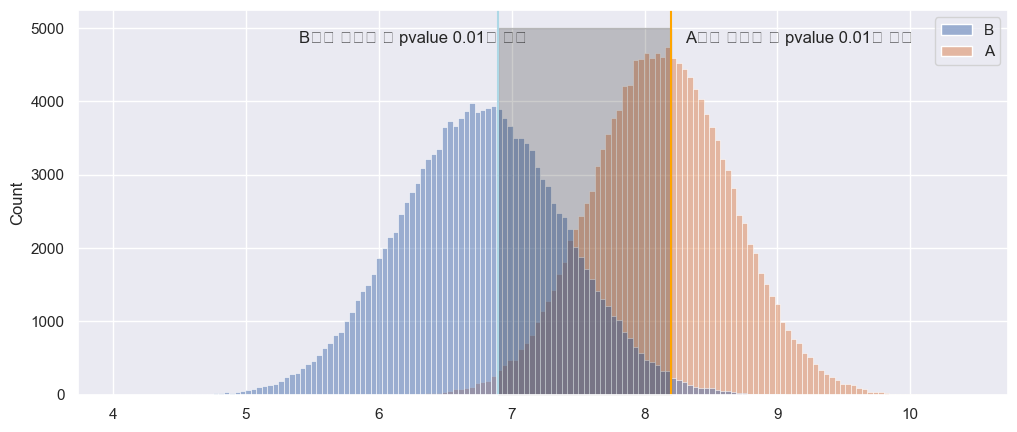

In [94]:
# 문제 3에서 사용하는 참고 그래프
plt.figure(figsize=(12, 5))
X, y = gmm.sample(300000)
sns.histplot(x=X[:,0], hue=np.where(y== 0, 'B', 'A'))
pos_A = norm.ppf(0.99, loc=mu_A, scale=std_A)
pos_B = norm.ppf(0.01, loc=mu_B, scale=std_B)
plt.gca().axvline(pos_A, c='orange')
plt.gca().annotate("A라고 가정할 떄 pvalue 0.01인 지점", (pos_A + 0.1, 4800))
plt.gca().fill_between([pos_A, pos_B], y1=0, y2=5000, alpha=0.2, color='black')
plt.gca().axvline(pos_B, c='lightblue')
plt.gca().annotate("B라고 가정할 떄 pvalue 0.01인 지점", (pos_B - 1.5, 4800))
plt.show()

## 단계 3-1

In [95]:
df_prob3 = df_base.assign(
    prob_A=lambda x: 1 - norm.cdf(x['target'], loc=mu_A, scale=std_A),
    prob_B=lambda x: norm.cdf(x['target'], loc=mu_B, scale=std_B)
)

## 단계 3-2

In [96]:
df_prob3 = df_prob3.loc[
    (df_prob3['prob_A'] < 0.01) |
    (df_prob3['prob_B'] < 0.01)
].copy()

In [97]:
df_prob3['target_A'].value_counts()

True     68864
False    55736
Name: target_A, dtype: int64

In [98]:
len(df_prob3)

124600

## 단계 3-3

In [99]:
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

ohe = OneHotEncoder(sparse=False)
ohe.fit(df_prob3[cat_cols])
ohe_cols = ohe.get_feature_names().tolist()
df_prob3[ohe_cols] = pd.DataFrame(ohe.transform(df_prob3[cat_cols]), columns=ohe_cols, index=df_prob3.index)

In [100]:
X_cols = cont_cols + ohe_cols 

**출제자 노트**

XGBClassifier의 하이퍼 파라미터는 GridSearchCV를 통해 도출한 결과 인데, 이는 GPU를 사용하지 않으면 굉장히 오래 걸리므로,
문제화하지 않았다.

In [101]:
"""
#Grid Search를 통한 XGB 초매개변수 탐색 

from sklearn.model_selection import GridSearchCV

est = xgb.XGBClassifier(tree_method='gpu_hist', colsample_bytree=0.25, max_depth=2, n_estimators=500, random_state=123)
grch = GridSearchCV(est, 
                    param_grid={
                        'reg_alpha': [0.0, 0.01, 0.1],
                        'reg_lambda': [0.0, 0.01, 0.1],
                    }, 
                    cv=5)
grch.fit(df_prob3[X_cols], df_prob3['target_A'])
"""

"\n#Grid Search를 통한 XGB 초매개변수 탐색 \n\nfrom sklearn.model_selection import GridSearchCV\n\nest = xgb.XGBClassifier(tree_method='gpu_hist', colsample_bytree=0.25, max_depth=2, n_estimators=500, random_state=123)\ngrch = GridSearchCV(est, \n                    param_grid={\n                        'reg_alpha': [0.0, 0.01, 0.1],\n                        'reg_lambda': [0.0, 0.01, 0.1],\n                    }, \n                    cv=5)\ngrch.fit(df_prob3[X_cols], df_prob3['target_A'])\n"

In [102]:
#grch.best_estimator_, grch.best_score_, grch.best_params_

## 단계 3-4

In [103]:
from sklearn.model_selection import train_test_split
df_prob3_train, df_prob3_test = train_test_split(df_prob3, train_size=0.8, random_state=123)

## 단계 3-5

In [104]:
clf = xgb.XGBClassifier(max_depth=2, 
                        colsample_bytree=0.25, 
                        n_estimators=500, 
                        reg_alpha=0.1, reg_lambda =0.1,
                        random_state=123)
clf.fit(df_prob3_train[X_cols], df_prob3_train['target_A'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.25, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=123, reg_alpha=0.1,
              reg_lambda=0.1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

In [105]:
from sklearn.metrics import accuracy_score

C = accuracy_score(df_prob3_test['target_A'], clf.predict(df_prob3_test[X_cols]))
C

0.6547351524879614

In [106]:
df_prob3_test['target_A'].mean()

0.5509630818619583

pipeline을 이용해서 해봅시다~

In [115]:
ct_xgb = ColumnTransformer([
    ('pt', 'passthrough', cont_cols),
     ('ohe', OneHotEncoder(sparse=False), cat_cols)
])
clf = make_pipeline(ct_xgb, xgb.XGBClassifier(max_depth=2, 
                        colsample_bytree=0.25, 
                        n_estimators=500, 
                        reg_alpha=0.1, reg_lambda =0.1,
                        random_state=123))
X_cols_xgb = cont_cols + cat_cols
clf.fit(df_prob3_train[X_cols_xgb], df_prob3_train['target_A'])

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pt', 'passthrough',
                                                  ['cont0', 'cont1', 'cont2',
                                                   'cont3', 'cont4', 'cont5',
                                                   'cont6', 'cont7', 'cont8',
                                                   'cont9', 'cont10', 'cont11',
                                                   'cont12', 'cont13']),
                                                 ('ohe',
                                                  OneHotEncoder(categorical_features=None,
                                                                categori...
                 XGBClassifier(base_score=0.5, booster='gbtree',
         

In [116]:
accuracy_score(df_prob3_test['target_A'], clf.predict(df_prob3_test[X_cols_xgb]))

0.6547351524879614

# 문제 4

**출제자 노트** 

선형회귀모델을 사용할 때 연속형 변수들은 아무런 도움을 주지 못합니다. 하지만 시각화를 통해서 살펴보면 연속형 변수의 구간 별로 나타나는 특성을 활용한다면 성능을 크게 올릴 수 있는데요. 다음 문제는 구간화 기법 연습과 구간 범주 변수를 target의 평균값으로 바꾸어 활용하는 기법을 응용했습니다. 복잡한 데이터 처리 과정에 대한 대응 연습을 위해 출제했습니다.

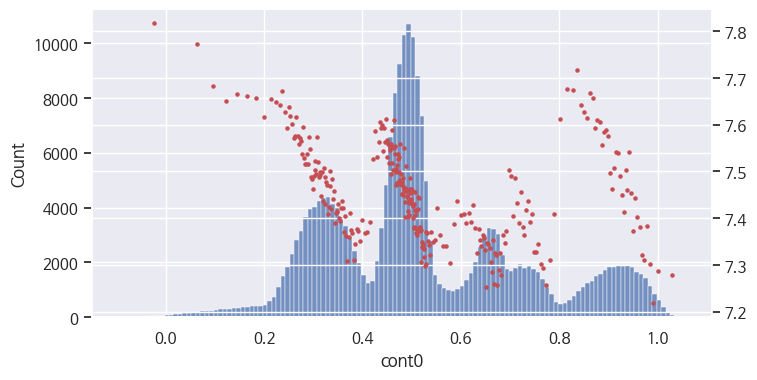

In [117]:
# 문제에 제공된 그래프
plt.figure(figsize=(8, 4))
col = 'cont0'
tmp = df_train.groupby(pd.qcut(df_train[col], q=300))[['target']].mean()
sns.histplot(df_train[col])
plt.gca().twinx().scatter((tmp.index.categories.left + tmp.index.categories.right) / 2, tmp['target'], c='r', s=5)
plt.show()

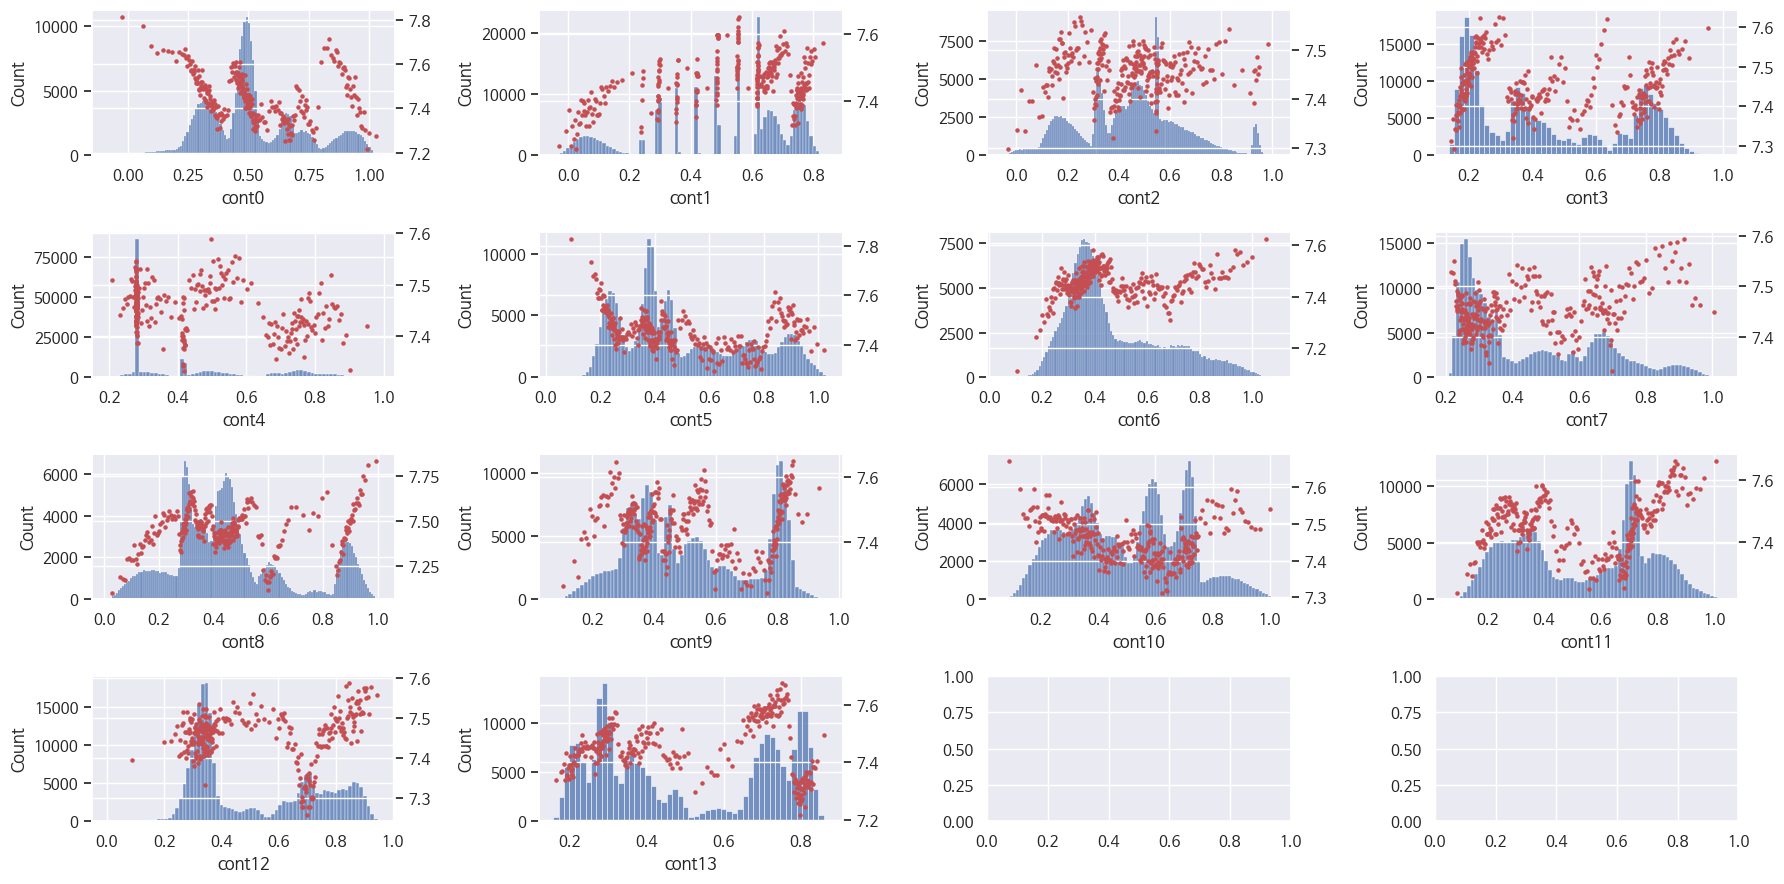

In [118]:
# 다른 변수에 대해서도 그래프를 출력

fig, axes = plt.subplots(4, 4, figsize=(18, 9))
for i, ax in enumerate(axes.ravel()[:14]):
    col = 'cont{}'.format(i)
    sns.histplot(data=df_train, x=col, ax=ax)
    tmp = df_train.groupby(pd.qcut(df_train[col], q=300))[['target']].mean()
    ax.twinx().scatter((tmp.index.categories.left + tmp.index.categories.right) / 2, 
                       tmp['target'], c='r', s=5)
plt.tight_layout()
plt.show()

다른 변수도 비슷한 양상을 보이고 있습니다.

In [119]:
from sklearn.model_selection import KFold, train_test_split

## 단계 4-1

In [120]:
# Get Dummies로 연습
df_prob4 = pd.get_dummies(df_train, drop_first=True, columns=cat_cols)

## 단계 4-2

In [121]:
df_prob4_train, df_prob4_test = train_test_split(df_prob4, 
                                         train_size=0.8, random_state=123)
df_prob4_train = df_prob4_train.copy() # 낮은 sklearn 버젼에서 reference warning이 나서 deep copy를 한다.
df_prob4_test = df_prob4_test.copy() # 낮은 sklearn 버젼에서 reference warning이 나서 deep copy를 한다.

## 단계 4-3

In [122]:
q = np.linspace(0, 1, 101) # 100개의 분위 영역을 나타내기 위해 0~1을 101개로 쪼갠다.
qt = df_prob4_train['cont0'].quantile(q) # 분위수별 cont0 값을 구한다
qt.iloc[[0, -1]] = [-np.inf, np.inf] # 처음 구간은 -무한대 마지막 구간은 무한대로 하여 NAN이 발생하지 않도록 
q_val = pd.cut(df_prob4_train['cont0'] ,qt)
q_mean = df_prob4_train.groupby(q_val)['target'].mean()
df_prob4_train['cont0_q'] = q_val.map(q_mean).astype(float) # 분위수별 평균을 구한다 
df_prob4_test['cont0_q'] = pd.cut(df_prob4_test['cont0'], qt).map(q_mean).astype(float)

In [123]:
q_mean

cont0
(-inf, 0.111]     7.771331
(0.111, 0.176]    7.672157
(0.176, 0.22]     7.648393
(0.22, 0.24]      7.661868
(0.24, 0.252]     7.624402
                    ...   
(0.933, 0.944]    7.499775
(0.944, 0.957]    7.436819
(0.957, 0.97]     7.380333
(0.97, 0.987]     7.329227
(0.987, inf]      7.258991
Name: target, Length: 100, dtype: float64

In [124]:
df_prob4_train['cont0_q'].agg(['mean', 'std'])

mean    7.456532
std     0.103150
Name: cont0_q, dtype: float64

## 단계 4-4

In [125]:
q = np.linspace(0, 1, 101) # 100개의 분위 영역을 나타내기 위해 0~1을 101개로 쪼갠다.
for i in cont_cols[1:]:
    qt = df_prob4_train[i].quantile(q)
    qt.iloc[[0, -1]] += [-np.inf, np.inf]
    q_val = pd.cut(df_prob4_train[i] ,qt)
    q_mean = df_prob4_train.groupby(q_val)['target'].mean()
    q_col = '{}_q'.format(i)
    df_prob4_train[q_col] = q_val.map(q_mean).astype(float)
    df_prob4_test[q_col] = pd.cut(df_prob4_test[i], qt).map(q_mean).astype(float)

In [126]:
df_prob4_train

cont0    cont1    cont2    cont3    cont4    cont5    cont6  \
id                                                                      
487693  0.49355  0.69104  0.66940  0.46424  0.78825  0.34951  0.30596   
307175  0.66260  0.55180  0.31117  0.83165  0.22354  0.34808  0.65781   
493409  0.87161  0.69037  0.33452  0.69755  0.28069  0.93415  0.63591   
414858  0.51951  0.03523  0.32366  0.38940  0.41430  0.73061  0.37822   
408161  0.86293  0.61935  0.70905  0.82617  0.41898  0.43902  0.31892   
...         ...      ...      ...      ...      ...      ...      ...   
486483  0.28889  0.48685  0.32203  0.73784  0.27977  0.75858  0.55792   
397343  0.29700  0.61783  0.12610  0.47566  0.27969  0.25545  0.44590   
119442  0.52022  0.73148  0.31349  0.78521  0.27829  0.76344  0.60008   
127964  0.45828  0.03341  0.07184  0.20044  0.78711  0.20317  0.74676   
128591  0.50667  0.66313  0.71741  0.33474  0.27615  0.49772  0.14655   

          cont7    cont8    cont9  ...   cont4_q   cont5_q   cont6_q  \
id                                 ...                                 
487693  0.69445  0.19411  0.35497  ...  7.444439  7.507718  7.418108   
307175  0.30914  0.48613  0.59179  ...  7.464061  7.507718  7.447277   
493409  0.87033  0.93617  0.79620  ...  7.462176  7.471819  7.454580   
414858  0.62359  0.34185  0.38249  ...  7.371190  7.354649  7.498205   
408161  0.58007  0.37662  0.37795  ...  7.406167  7.465528  7.446922   
...         ...      ...      ...  ...       ...       ...       ...   
486483  0.88636  0.89498  0.81318  ...  7.507587  7.406803  7.401287   
397343  0.27194  0.28722  0.16011  ...  7.464815  7.453588  7.507047   
119442  0.90591  0.47102  0.66770  ...  7.454455  7.375209  7.419841   
127964  0.27128  0.32239  0.49103  ...  7.444439  7.608560  7.480661   
128591  0.24077  0.46033  0.63709  ...  7.474209  7.525761  7.205495   

         cont7_q   cont8_q   cont9_q  cont10_q  cont11_q  cont12_q  cont13_q  
id                                                                            
487693  7.424195  7.466343  7.391288  7.494510  7.489119  7.450950  7.357680  
307175  7.431217  7.424309  7.305747  7.434794  7.436207  7.481821  7.426932  
493409  7.537384  7.684391  7.384950  7.377006  7.615075  7.558415  7.483465  
414858  7.464006  7.428804  7.437616  7.456432  7.375974  7.447048  7.438021  
408161  7.391109  7.546018  7.418989  7.426295  7.338579  7.514672  7.337787  
...          ...       ...       ...       ...       ...       ...       ...  
486483  7.573510  7.483612  7.516165  7.457607  7.385930  7.556751  7.452510  
397343  7.470325  7.459401  7.302895  7.505173  7.332706  7.491354  7.308851  
119442  7.558578  7.439213  7.346302  7.440902  7.385930  7.327784  7.426009  
127964  7.433922  7.632295  7.458405  7.494052  7.479079  7.450502  7.355018  
128591  7.440098  7.421824  7.366878  7.437171  7.412907  7.306164  7.496684  

[192000 rows x 59 columns]

## 단계 4-5

In [127]:
# 이렇게하면 안된다.
X_cols = [i for i in df_prob4_train.columns if (i.startswith('cat') or i.endswith('_q')) and i != 'cat']
X_cols

['cat0_B',
 'cat1_B',
 'cat2_B',
 'cat3_C',
 'cat3_D',
 'cat4_C',
 'cat5_B',
 'cat5_C',
 'cat5_D',
 'cat6_B',
 'cat6_C',
 'cat7_D',
 'cat7_E',
 'cat7_G',
 'cat8_C',
 'cat8_D',
 'cat8_E',
 'cat8_G',
 'cat9_B',
 'cat9_F',
 'cat9_G',
 'cat9_H',
 'cat9_I',
 'cat9_J',
 'cat9_K',
 'cat9_L',
 'cat9_M',
 'cat9_N',
 'cat9_O',
 'cont0_q',
 'cont1_q',
 'cont2_q',
 'cont3_q',
 'cont4_q',
 'cont5_q',
 'cont6_q',
 'cont7_q',
 'cont8_q',
 'cont9_q',
 'cont10_q',
 'cont11_q',
 'cont12_q',
 'cont13_q']

In [128]:
X_cols = [i for i in df_prob4_train.columns if i.endswith('_q') and i != 'cat']\
        + [i for i in df_prob4_train.columns if i.startswith('cat') and i != 'cat']
', '.join(X_cols)

'cont0_q, cont1_q, cont2_q, cont3_q, cont4_q, cont5_q, cont6_q, cont7_q, cont8_q, cont9_q, cont10_q, cont11_q, cont12_q, cont13_q, cat0_B, cat1_B, cat2_B, cat3_C, cat3_D, cat4_C, cat5_B, cat5_C, cat5_D, cat6_B, cat6_C, cat7_D, cat7_E, cat7_G, cat8_C, cat8_D, cat8_E, cat8_G, cat9_B, cat9_F, cat9_G, cat9_H, cat9_I, cat9_J, cat9_K, cat9_L, cat9_M, cat9_N, cat9_O'

In [129]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

reg = Ridge(alpha=0.1)
reg.fit(df_prob4_train[X_cols], df_prob4_train['target'])

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [130]:
D = mean_squared_error(df_prob4_test['target'], reg.predict(df_prob4_test[X_cols]))
D

0.7211650695566528

**시험장: 0.72, BDC: 0.72**

## 단계 6 (Optional)

In [131]:
def qme(df_train, df_test, num_q):
    q = np.linspace(0, 1, num_q + 1) 
    q_arr_train = [df_train]
    q_arr_test = [df_test]
    for i in cont_cols:
        qt = df_train[i].quantile(q)
        qt.iloc[[0, -1]] += [-np.inf, np.inf]
        q_val = pd.cut(df_train[i] ,qt)
        q_mean = df_train.groupby(q_val)['target'].mean()
        q_col = '{}_q'.format(i)
        q_arr_train.append(q_val.map(q_mean).astype(float).rename(q_col))
        q_arr_test.append(pd.cut(df_test[i], qt).map(q_mean).astype(float).rename(q_col))
    return pd.concat(q_arr_train, axis=1), pd.concat(q_arr_test, axis=1)

In [132]:
scores_ = []
for train_idx, test_idx in KFold(n_splits=5, random_state=123, shuffle=True).split(df_prob4):
    df_train_cv, df_test_cv = df_prob4.iloc[train_idx], df_prob4.iloc[test_idx]
    df_train_cv, df_test_cv = qme(df_train_cv, df_test_cv, 100)
    reg.fit(df_train_cv[X_cols], df_train_cv['target'])
    scores_.append(mean_squared_error(df_test_cv['target'], reg.predict(df_test_cv[X_cols])))
D = np.mean(scores_)
print(scores_, D)

[0.7211650695566527, 0.7232593159661542, 0.7280554161316752, 0.7176382661375348, 0.7127820645892671] 0.7205800264762569


In [133]:
means_ = []
for i in [100, 200, 300]:
    scores_ = []
    for train_idx, test_idx in KFold(n_splits=5, random_state=123, shuffle=True).split(df_prob4):
        df_train_cv, df_test_cv = df_prob4.iloc[train_idx], df_prob4.iloc[test_idx]
        df_train_cv, df_test_cv = qme(df_train_cv, df_test_cv, i)
        reg.fit(df_train_cv[X_cols], df_train_cv['target'])
        scores_.append(mean_squared_error(df_test_cv['target'], reg.predict(df_test_cv[X_cols])))
    means_.append(np.mean(scores_))
E = [100, 200, 300][np.argmin(means_)]
print(means_, E)

[0.7205800264762569, 0.7234356748348141, 0.7264199692534403] 100


In [134]:
D + E

100.72058002647626

# 문제 5



In [135]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

**출제자 노트**

본 문제의 데이터셋은 GPU가 없다면, 학습하는 데에는 약 1~2분 정도 걸립니다. GPU는 시험환경에서 사용하지 못합니다. 수행시간이 1 ~ 2분 정도가 걸리는 경우에는 구현의 정확성이 중요하니, 구현의 정확도를 높혀 해결 시간을 줄이는 연습을 위해 출제했습니다. 

## 단계 5-1

In [136]:
df_prob5 = df_base.copy()

# pandas get_dummies말고 sklearn.preprocessing OneHotEncoder로 연습
# pandas.get_dummies는 OneHotEncoding이 적용이 되서 사용이 편하지만,
# Train의 나오는 범주값과 Test에 나오는 범주값이 다를 경우에 사용하기에 어렵다. 
# 이럴 경우에는 OneHotEncoder를 쓰는게 오히려 편리하다.
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_prob5[cat_cols])
ohe_cols = ohe.get_feature_names().tolist()
df_prob5[ohe_cols] = pd.DataFrame(ohe.transform(df_prob5[cat_cols]), columns = ohe_cols, index=df_prob5.index)

## 단계 5-2

In [137]:
df_prob5_train, df_prob5_test = train_test_split(df_prob5, train_size=0.8, random_state=123)

## 단계 5-3

In [138]:
X_cols_5 = cont_cols + ohe_cols

In [139]:
param_sets = [
    {"colsample_bytree": 0.25, "n_estimators": 300},
    {"colsample_bytree": 0.5, "n_estimators": 300},
    {"colsample_bytree": 0.25, "n_estimators": 500},
]
scores = []
for p in param_sets:
    # dictionary 형태를 풀어서 Parameter로 전달할 때, **를 사용한다
    reg = xgb.XGBRegressor(max_depth=2, random_state=123, **p)
    reg.fit(df_prob5_train[X_cols_5], df_prob5_train['target'])
    scores.append(mean_squared_error(df_prob5_test['target'], reg.predict(df_prob5_test[X_cols_5])))
# 눈으로 보고 D, F를 구해도 되고 함수를 써서 해도 된다. 여기선 함수로
A = np.argmin(scores)
B = scores[A]
A + 1, B, A + 1 + B

(3, 0.7165760792818646, 3.7165760792818645)

**시험장: 3.72, BDC: 3.71**

# 문제 6

**출제자 노트**

본 풀이에서 제시한 두 개의 모델을 Blending하는 것이라 구현하는데 오래걸립니다.

실제 시험에서 시간이 정말 많이 남는 경우가 아니라면, 아래와 같은 풀이를 내기는 힘듭니다..

풀이는 실제 분석에서 지금까지 했던 것을 요약하는 차원으로 보여주는 것입니다.

우선적으로 제출할 수 있는 결과물을 만드는 것이 중요합니다.

실제 시험에서는 이전 문제를 푸는 과정에서 사용할 만한 것이 있다면, 이를 사용하여 Kaggle형의 아웃풋을 만드는 데 사용합니다. 

없다면 가장 간단한 모델로 아웃풋을 만들어 내는 것이 중요합니다.


## 방법 1

In [136]:
from sklearn.preprocessing import OneHotEncoder

# 문제 3번에서 도출한 결과를 파생 변수로 넣고 활용한다.
df_prob6_cls = df_base.assign(
    prob_A=lambda x: 1 - norm.cdf(x['target'], loc=mu_A, scale=std_A),
    prob_B=lambda x: norm.cdf(x['target'], loc=mu_B, scale=std_B)
)

df_prob6_cls.loc[(df_prob6_cls['prob_A'] > df_prob6_cls['prob_B']) & (df_prob6_cls['prob_B'] < 0.01), 'Class'] = 1
df_prob6_cls.loc[(df_prob6_cls['prob_A'] < df_prob6_cls['prob_B']) & (df_prob6_cls['prob_A'] < 0.01), 'Class'] = 0
df_prob6_cls.dropna(inplace=True)
df_prob6_cls['Class'] = df_prob6_cls['Class'].astype(np.int8)

In [137]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb
X_cols = cont_cols + cat_cols
ct_xgb_cls = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_cols),
    ('pt', 'passthrough', cont_cols)
])
clf = make_pipeline(ct_xgb_cls, xgb.XGBClassifier(max_depth=2, 
                        colsample_bytree=0.25, 
                        n_estimators=500, 
                        reg_alpha=0.1, reg_lambda =0.1, random_state=123))
clf.fit(df_prob6_cls[X_cols], df_prob6_cls['Class'])

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['cat0', 'cat1', 'cat2',
                                     

## 방법 2

In [138]:
df_prob6 = df_base.assign(target_A_prob=lambda x:clf.predict_proba(x[X_cols])[:,1])
df_prob6_test = df_test.assign(target_A_prob=lambda x: clf.predict_proba(x[X_cols])[:, 1])

In [139]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, random_state=123, shuffle=True)
ct_xgb_1 = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_cols),
    ('pt', 'passthrough', cont_cols)
])
reg_xgb = make_pipeline(ct_xgb_1, 
                    xgb.XGBRegressor(max_depth=2, colsample_bytree=0.25, n_estimators=500, random_state=123))

scores_1 = cross_val_score(reg_xgb,  df_prob6[X_cols], df_prob6['target'], cv=kf, scoring='neg_mean_squared_error')
scores_1

array([-0.71657608, -0.71822012, -0.72360819, -0.7142422 , -0.70871335])

In [140]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, random_state=123, shuffle=True)
X_cols_2 = cont_cols + cat_cols + ['target_A_prob']
ct_xgb_2 = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_cols),
    ('pt', 'passthrough', cont_cols + ['target_A_prob'])
])
reg_xgb = make_pipeline(ct_xgb_2, 
                    xgb.XGBRegressor(max_depth=2, colsample_bytree=0.25, n_estimators=500, random_state=123))

scores_2 = cross_val_score(reg_xgb,  df_prob6[X_cols_2], df_prob6['target'], cv=kf, scoring='neg_mean_squared_error')
scores_2

array([-0.71064094, -0.7128614 , -0.71806878, -0.7083828 , -0.70272486])

In [141]:
np.mean(scores_1), np.mean(scores_2)

(-0.7162719870728312, -0.7105357560846794)

## 1-st model

In [142]:
# 문제 5번에서 들고 온다.
X_cols_xgb = cont_cols + cat_cols + ['target_A_prob']
ct_xgb = ColumnTransformer([
    ('ohe', OneHotEncoder(), cat_cols),
    ('pt', 'passthrough', cont_cols + ['target_A_prob'])
])
reg_xgb = make_pipeline(ct_xgb, 
                    xgb.XGBRegressor(max_depth=2, colsample_bytree=0.25, n_estimators=500, random_state=123))
reg_xgb.fit(df_prob6[X_cols_xgb], df_prob6['target'])

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['cat0', 'cat1', 'cat2',
                                     

## 2-nd model

In [143]:
# 문제 4번에서 들고 온다.
def qme(df_train, df_test, num_q):
    q = np.linspace(0, 1, num_q + 1) 
    for i in cont_cols:
        qt = df_train[i].quantile(q)
        qt.iloc[[0, -1]] += [-np.inf, np.inf]
        q_val = pd.cut(df_train[i] ,qt)
        q_mean = df_train.groupby(q_val)['target'].mean()
        q_col = '{}_q'.format(i)
        df_train[q_col] = q_val.map(q_mean).astype(float)
        df_test[q_col] = pd.cut(df_test[i], qt).map(q_mean).astype(float)

qme(df_prob6, df_prob6_test, 300)

In [144]:
from sklearn.linear_model import LinearRegression
ct_2 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('q', 'passthrough', ['{}_q'.format(i) for i in cont_cols])
    ]
)
# target_A_prob를 빼고 해보자
X_cols_lr = cat_cols + ['{}_q'.format(i) for i in cont_cols]# + ['target_A_prob']
reg_lr = make_pipeline(ct_2, LinearRegression())
score_1 = cross_val_score(reg_lr, df_prob6[X_cols_lr], df_prob6['target'], cv=kf, scoring='neg_mean_squared_error')
score_1

array([-0.70847119, -0.71025606, -0.71421778, -0.70509679, -0.69957114])

In [145]:
# target_A_prob를 빼고 해보자
ct_3 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('q', 'passthrough', ['{}_q'.format(i) for i in cont_cols] + ['target_A_prob'])
    ]
)

X_cols_lr = cat_cols + ['{}_q'.format(i) for i in cont_cols] + ['target_A_prob']
reg_lr = make_pipeline(ct_3, LinearRegression())
score_2 = cross_val_score(reg_lr, df_prob6[X_cols_lr], df_prob6['target'], cv=kf, scoring='neg_mean_squared_error')
score_2

array([-0.70423546, -0.70666756, -0.71114065, -0.70139458, -0.6960069 ])

In [146]:
np.mean(score_1), np.mean(score_2)

(-0.7075225934892186, -0.7038890281677175)

In [147]:
scores_3 = []
for train_idx, test_idx in kf.split(df_prob6):
    df_cv_train, df_cv_test = df_prob6.iloc[train_idx].copy(), df_prob6.iloc[test_idx].copy()
    qme(df_cv_train, df_cv_test, 100)
    reg_lr.fit(df_cv_train[X_cols_lr], df_cv_train['target'])
    scores_3.append(mean_squared_error(df_cv_test['target'], reg_lr.predict(df_cv_test[X_cols_lr])))
scores_3

[0.7117483729514666,
 0.7143547855933918,
 0.7196513120001353,
 0.7093875175475711,
 0.7041682884403496]

In [148]:
np.mean(scores_3)

0.7118620553065829

In [149]:
from sklearn.linear_model import LinearRegression

ct_3 = ColumnTransformer(
    [('ohe', OneHotEncoder(drop='first'), cat_cols),
     ('q', 'passthrough', ['{}_q'.format(i) for i in cont_cols] + ['target_A_prob'])]
)
X_cols_lr = cat_cols + ['{}_q'.format(i) for i in cont_cols] + ['target_A_prob']
reg_lr = make_pipeline(ct_3, LinearRegression())
reg_lr.fit(df_prob6[X_cols_lr], df_prob6['target'])

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('ohe',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True),
                                                  ['cat0', 'cat1', 'cat2',
                                  

In [150]:
df_ans = pd.DataFrame(
    {
        'target': reg_xgb.predict(df_prob6_test[X_cols_xgb]) * 0.5 + reg_lr.predict(df_prob6_test[X_cols_lr]) * 0.5
    },
    index = df_prob6_test.index
)
df_ans.index.name = 'id'

df_ans.to_csv('answer6.csv')
!head answer6.csv

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 실제 정답과 비교

In [151]:
df_real_ans = pd.read_csv('test_prob_ans.csv', index_col='id')

In [152]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_real_ans['target'], df_ans['target']) ** 0.5

0.8472579729140737

In [153]:
mean_squared_error(df_real_ans['target'], reg_xgb.predict(df_prob6_test[X_cols_xgb])) ** 0.5

0.8473356006330207

In [154]:
mean_squared_error(df_real_ans['target'], reg_lr.predict(df_prob6_test[X_cols_lr])) ** 0.5

0.8495487740441023

아주 적은 성능 개선을 보입니다.